<a href="https://colab.research.google.com/github/Janya-Sharma-22/machine_learning/blob/main/EXP_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_card_fraud_100.csv to credit_card_fraud_100.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_path = list(uploaded.keys())[0]
df = pd.read_csv(dataset_path)

In [ ]:
df.columns = df.columns.str.strip()
print(df)

     Time        V1        V2        V3        V4        V5        V6  \
0   15795 -1.875677 -1.027711 -0.368450  1.326504 -0.263242  0.881930   
1     860 -1.366782  0.741241  0.157202 -0.954390  0.534809 -1.684872   
2   76820  0.636305 -1.710530 -0.115473 -2.339597  1.905907 -0.747970   
3   54886 -0.906721  0.118978  0.831709 -0.351537  0.227602 -2.138800   
4    6265  0.476043  1.000486 -0.319355 -1.019341 -0.194670  1.997008   
..    ...       ...       ...       ...       ...       ...       ...   
95  38044  0.065649 -0.433942  0.237485  2.052453  0.265955  0.246104   
96  51214  1.169208 -0.732692 -0.317369  0.251195 -0.213473  1.051783   
97  61228  0.873317 -0.578277  0.458441 -0.453797  0.138508 -0.247368   
98  48984  0.205650 -0.135717  0.186212 -2.029231  0.764252 -0.065477   
99  40774 -1.443483 -0.793505  0.826190  1.961303  0.010798  0.807417   

          V7        V8        V9       V10       Amount  Class  
0   0.840527 -0.068981  0.454563  0.088952  1571.912046   

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)
print(df)

     Time        V1        V2        V3        V4        V5        V6  \
0   15795 -1.875677 -1.027711 -0.368450  1.326504 -0.263242  0.881930   
1     860 -1.366782  0.741241  0.157202 -0.954390  0.534809 -1.684872   
2   76820  0.636305 -1.710530 -0.115473 -2.339597  1.905907 -0.747970   
3   54886 -0.906721  0.118978  0.831709 -0.351537  0.227602 -2.138800   
4    6265  0.476043  1.000486 -0.319355 -1.019341 -0.194670  1.997008   
..    ...       ...       ...       ...       ...       ...       ...   
95  38044  0.065649 -0.433942  0.237485  2.052453  0.265955  0.246104   
96  51214  1.169208 -0.732692 -0.317369  0.251195 -0.213473  1.051783   
97  61228  0.873317 -0.578277  0.458441 -0.453797  0.138508 -0.247368   
98  48984  0.205650 -0.135717  0.186212 -2.029231  0.764252 -0.065477   
99  40774 -1.443483 -0.793505  0.826190  1.961303  0.010798  0.807417   

          V7        V8        V9       V10       Amount  Class  
0   0.840527 -0.068981  0.454563  0.088952  1571.912046   

In [ ]:
df = df.drop_duplicates()
print(df)

     Time        V1        V2        V3        V4        V5        V6  \
0   15795 -1.875677 -1.027711 -0.368450  1.326504 -0.263242  0.881930   
1     860 -1.366782  0.741241  0.157202 -0.954390  0.534809 -1.684872   
2   76820  0.636305 -1.710530 -0.115473 -2.339597  1.905907 -0.747970   
3   54886 -0.906721  0.118978  0.831709 -0.351537  0.227602 -2.138800   
4    6265  0.476043  1.000486 -0.319355 -1.019341 -0.194670  1.997008   
..    ...       ...       ...       ...       ...       ...       ...   
95  38044  0.065649 -0.433942  0.237485  2.052453  0.265955  0.246104   
96  51214  1.169208 -0.732692 -0.317369  0.251195 -0.213473  1.051783   
97  61228  0.873317 -0.578277  0.458441 -0.453797  0.138508 -0.247368   
98  48984  0.205650 -0.135717  0.186212 -2.029231  0.764252 -0.065477   
99  40774 -1.443483 -0.793505  0.826190  1.961303  0.010798  0.807417   

          V7        V8        V9       V10       Amount  Class  
0   0.840527 -0.068981  0.454563  0.088952  1571.912046   

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
print(df)

     Time        V1        V2        V3        V4        V5        V6  \
0   15795 -1.875677 -1.027711 -0.368450  1.326504 -0.263242  0.881930   
1     860 -1.366782  0.741241  0.157202 -0.954390  0.534809 -1.684872   
2   76820  0.636305 -1.710530 -0.115473 -2.339597  1.905907 -0.747970   
3   54886 -0.906721  0.118978  0.831709 -0.351537  0.227602 -2.138800   
4    6265  0.476043  1.000486 -0.319355 -1.019341 -0.194670  1.997008   
..    ...       ...       ...       ...       ...       ...       ...   
95  38044  0.065649 -0.433942  0.237485  2.052453  0.265955  0.246104   
96  51214  1.169208 -0.732692 -0.317369  0.251195 -0.213473  1.051783   
97  61228  0.873317 -0.578277  0.458441 -0.453797  0.138508 -0.247368   
98  48984  0.205650 -0.135717  0.186212 -2.029231  0.764252 -0.065477   
99  40774 -1.443483 -0.793505  0.826190  1.961303  0.010798  0.807417   

          V7        V8        V9       V10       Amount  Class  
0   0.840527 -0.068981  0.454563  0.088952  1571.912046   

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(df)

     Time        V1        V2        V3        V4        V5        V6  \
0   15795 -1.875677 -1.027711 -0.368450  1.326504 -0.263242  0.881930   
1     860 -1.366782  0.741241  0.157202 -0.954390  0.534809 -1.684872   
2   76820  0.636305 -1.710530 -0.115473 -2.339597  1.905907 -0.747970   
3   54886 -0.906721  0.118978  0.831709 -0.351537  0.227602 -2.138800   
4    6265  0.476043  1.000486 -0.319355 -1.019341 -0.194670  1.997008   
..    ...       ...       ...       ...       ...       ...       ...   
95  38044  0.065649 -0.433942  0.237485  2.052453  0.265955  0.246104   
96  51214  1.169208 -0.732692 -0.317369  0.251195 -0.213473  1.051783   
97  61228  0.873317 -0.578277  0.458441 -0.453797  0.138508 -0.247368   
98  48984  0.205650 -0.135717  0.186212 -2.029231  0.764252 -0.065477   
99  40774 -1.443483 -0.793505  0.826190  1.961303  0.010798  0.807417   

          V7        V8        V9       V10       Amount  Class  
0   0.840527 -0.068981  0.454563  0.088952  1571.912046   

In [ ]:
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])
print("\n✅ Sample after scaling:")
print(df[['Time', 'Amount']].head())


✅ Sample after scaling:
       Time    Amount
0 -1.279419  0.632609
1 -1.801872  1.049374
2  0.855343  1.175960
3  0.088053  0.148063
4 -1.612795  0.298431


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n🔹 Train set size: {X_train.shape}")
print(f"🔹 Test set size: {X_test.shape}")


🔹 Train set size: (70, 12)
🔹 Test set size: (30, 12)


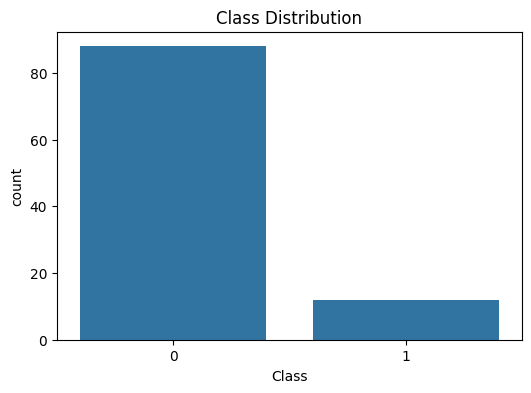

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [ ]:
print("🔹 Loading dataset...")
df = pd.read_csv("credit_card_fraud_100.csv")
print("✅ First 5 rows of the dataset:")
print(df.head())

🔹 Loading dataset...
✅ First 5 rows of the dataset:
    Time        V1        V2        V3        V4        V5        V6  \
0  15795 -1.875677 -1.027711 -0.368450  1.326504 -0.263242  0.881930   
1    860 -1.366782  0.741241  0.157202 -0.954390  0.534809 -1.684872   
2  76820  0.636305 -1.710530 -0.115473 -2.339597  1.905907 -0.747970   
3  54886 -0.906721  0.118978  0.831709 -0.351537  0.227602 -2.138800   
4   6265  0.476043  1.000486 -0.319355 -1.019341 -0.194670  1.997008   

         V7        V8        V9       V10       Amount  Class  
0  0.840527 -0.068981  0.454563  0.088952  1571.912046      0  
1 -0.038492 -2.578215  0.744038  1.165914  1838.375747      0  
2 -0.443480 -0.561367 -1.591314 -0.542605  1919.309720      1  
3  0.082656  0.314204  0.636631  0.877102  1262.112205      0  
4 -0.190911 -0.424216 -0.245070  0.463724  1358.251308      0  
